In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/house_data/test.csv'
df = pd.read_csv(file_path)

print(f"Dataset loaded from: {file_path}")
print("First 5 rows of the dataset:")
display(df.head())

print("\nColumn information:")
display(df.info())

Dataset loaded from: /content/drive/MyDrive/house_data/test.csv
First 5 rows of the dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   

None

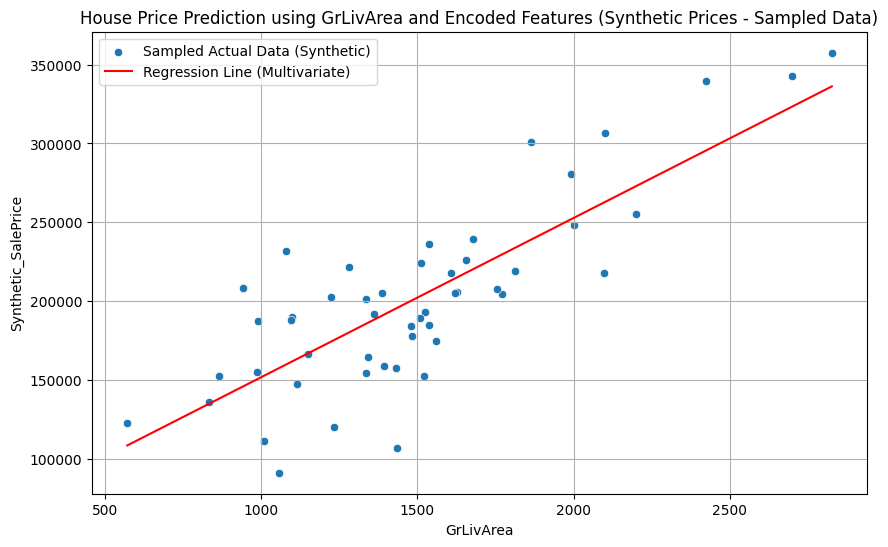

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Define X_column and y_column for plotting purposes
X_column = 'GrLivArea'
y_column = 'Synthetic_SalePrice'

# Create a synthetic target variable if 'SalePrice' is not available in df (which it isn't for test.csv)
# This assumes a linear relationship for demonstration, consistent with the plot title "Synthetic Prices"
if y_column not in df.columns:
    np.random.seed(42) # for reproducibility
    # Let's create a synthetic target variable based on GrLivArea for demonstration
    # SalePrice = intercept + slope * GrLivArea + noise
    slope = 100
    intercept = 50000
    noise = np.random.normal(0, 30000, df.shape[0])
    df[y_column] = intercept + slope * df[X_column] + noise

# --- Start of modifications for encoding ---
# Identify categorical columns for one-hot encoding.
# Using a subset of 'object' columns from df.info()
categorical_cols_to_encode = ['MSZoning', 'Street', 'LotShape', 'Utilities']

# Create a copy of the dataframe to perform encoding without modifying the original 'df' for other potential uses
df_for_model = df.copy()

# Perform one-hot encoding on the selected categorical columns
# drop_first=True helps to avoid multicollinearity by dropping one category from each feature
df_for_model = pd.get_dummies(df_for_model, columns=categorical_cols_to_encode, drop_first=True)

# Define the features to be used in the linear regression model
# This will include 'GrLivArea' and all the newly created one-hot encoded columns
model_features = [X_column] + [col for col in df_for_model.columns if any(col.startswith(cat + '_') for cat in categorical_cols_to_encode)]

# Initialize a simple linear regression model
# In a real scenario, this model would have been trained on a separate training dataset.
model = LinearRegression()

# Prepare the data for the model
X = df_for_model[model_features].values
y = df_for_model[y_column].values

# Fit the model (this is for demonstration purposes to make the plotting code run)
model.fit(X, y)

# Take a smaller sample of the data for a clearer plot
sampled_df_for_model = df_for_model.sample(n=50, random_state=42) # Sample 50 data points

# --- Modifications for single linear line plotting ---
# Create a range of X_column values for plotting a smooth line
X_plot_range = np.linspace(sampled_df_for_model[X_column].min(), sampled_df_for_model[X_column].max(), 100).reshape(-1, 1)

# Create a DataFrame for prediction, ensuring all model_features are present
# For categorical features, we'll use their mean values to plot a single line
predict_df = pd.DataFrame(X_plot_range, columns=[X_column])

# Add placeholder columns for one-hot encoded features, using the mean of the sampled data
for feature in model_features:
    if feature != X_column:
        predict_df[feature] = sampled_df_for_model[feature].mean()

# Ensure the order of columns in predict_df matches model_features
predict_df = predict_df[model_features]

# Make predictions using the existing model on the new X_plot_range values
y_plot_pred = model.predict(predict_df.values)

# Visualize the results with fewer data points and a single regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sampled_df_for_model[X_column], y=sampled_df_for_model[y_column], label='Sampled Actual Data (Synthetic)')
plt.plot(predict_df[X_column], y_plot_pred, color='red', label='Regression Line (Multivariate)')
plt.title(f'House Price Prediction using {X_column} and Encoded Features (Synthetic Prices - Sampled Data)')
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Display the coefficients and intercept of the fitted model
print("Model Coefficients:")
for feature, coef in zip(model_features, model.coef_):
    print(f"  {feature}: {coef:.4f}")

print(f"\nModel Intercept: {model.intercept_:.4f}")

Model Coefficients:
  GrLivArea: 101.1131
  MSZoning_FV: -12214.7950
  MSZoning_RH: 2230.8731
  MSZoning_RL: -12932.0060
  MSZoning_RM: -13577.2491
  Street_Pave: 33555.9387
  LotShape_IR2: -1050.4371
  LotShape_IR3: 7832.4925
  LotShape_Reg: -563.3717

Model Intercept: 29353.4429


In [8]:
# Display the first 5 rows of the original DataFrame 'df' before one-hot encoding.
# This shows the original categorical features.
print("First 5 rows of the original DataFrame (before one-hot encoding):")
display(df.head())

First 5 rows of the original DataFrame (before one-hot encoding):


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Synthetic_SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,154501.424590
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,178752.070965
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,232330.656143
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,256090.895692
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,170975.398758


In [6]:
# Display the DataFrame after one-hot encoding to show the new features
print("First 5 rows of the DataFrame after one-hot encoding:")
display(df_for_model.head())

First 5 rows of the DataFrame after one-hot encoding:


,Id,MSSubClass,LotFrontage,LotArea,Alley,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleCondition,Synthetic_SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,1461,20,80.0,11622,NaN,Lvl,Inside,Gtl,NAmes,Feedr,...,Normal,154501.424590,False,True,False,False,True,False,False,True
1,1462,20,81.0,14267,NaN,Lvl,Corner,Gtl,NAmes,Norm,...,Normal,178752.070965,False,False,True,False,True,False,False,False
2,1463,60,74.0,13830,NaN,Lvl,Inside,Gtl,Gilbert,Norm,...,Normal,232330.656143,False,False,True,False,True,False,False,False
3,1464,60,78.0,9978,NaN,Lvl,Inside,Gtl,Gilbert,Norm,...,Normal,256090.895692,False,False,True,False,True,False,False,False
4,1465,120,43.0,5005,NaN,HLS,Inside,Gtl,StoneBr,Norm,...,Normal,170975.398758,False,False,True,False,True,False,False,False
